<div style="background-color: #b8deff; padding: 10px; border-radius: 5px; font-family: Aptos; ">
    <h1><b> Cultural Tourism Route Optimization </b></h1>


<ul>
    <li><b>Authored by:</b> Uvini Wijesinghe</li>
    <li><b>Duration:</b> 10 Weeks</li>
    <li><b>Level:</b> Intermediate</li>
    <li><b>Pre-requisite Skills:</b> Python</li>
</ul>

</div>
</div>

<div style="font-family: Aptos; font-size: 16px;"> Creating optimised cultural tourism routes in Melbourne involves integrating data from multiple sources, including public memorials, sculptures, artworks, fountains, monuments, and landmarks, along with key transport infrastructure such as City Circle tram stops and Melbourne Visitor Shuttle bus stops. By analysing pedestrian movement patterns, the objective is to design routes that maximise visitor engagement by guiding them through high-interest cultural sites while ensuring accessibility and efficiency. <br>
<br><b>User Story</b>

<ul> <li><b>Title:</b> Optimised Cultural Tourism Routes in Melbourne</li> <li><b>As a:</b> Tourism Planner/City Developer </li> <li><b>I want to:</b> Integrate data from cultural landmarks, transport infrastructure (City Circle tram stops and Melbourne Visitor Shuttle bus stops), and pedestrian movement patterns to create optimised cultural tourism routes.</li> <li><b>So that:</b> Visitors can experience a diverse range of cultural sites efficiently, while being guided through high-traffic pedestrian zones and accessible transport hubs to maximise engagement with public artworks, fountains, and monuments.</li> </ul>

<br><b>Acceptance Criteria:</b>

1. All relevant public memorials, sculptures, artworks, fountains, monuments, and landmarks in Melbourne must be identified, mapped, and included in the dataset.

2. Data for City Circle tram stops, Melbourne Visitor Shuttle bus stops, and pedestrian pathways must be included to ensure routes are accessible via public transport.

3. High-footfall areas must be identified through pedestrian counting data to help determine the most popular areas and to adjust routes accordingly to optimise visitor engagement.

4. Optimised routes should guide visitors through high-interest cultural sites while ensuring accessibility to transport hubs and high pedestrian traffic zones.

5. Routes should cover the highest number of cultural landmarks while maintaining a smooth, logical flow for visitors.

6. The system should provide suggestions for areas where new cultural landmarks, public artworks, or monuments could be developed to encourage visitor traffic in underutilised spaces.

7. The final solution should have a user-friendly interface for tourists, displaying routes, landmarks, and transport stops in a clear and interactive map format.

</div>

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import folium
from folium.plugins import MarkerCluster

<div style="background-color: #def0ff; padding: 10px; border-radius: 5px; font-family: Aptos; ">
    <h3><b> 🚂 Train Routes </b></h3>
</div>

#### Train Routes

<div style="font-family: Aptos; font-size: 16px;"> <p>This dataset contains information about selected public transport routes in Victoria, Australia, specifically focusing on metropolitan train and tram services. Each record includes key details such as:</p> 

<ul> 
    <li><b>route_id:</b> A unique identifier for each route.</li> 
    <li><b>agency_id:</b> The identifier for the transport agency operating the route.</li> 
    <li><b>route_short_name:</b> A short name used to represent the route (e.g., line name).</li> 
    <li><b>route_long_name:</b> A longer description of the route, usually indicating its endpoints.</li> 
    <li><b>route_type:</b> A numerical code representing the type of transport (e.g., 2 for rail services).</li> 
    <li><b>route_color:</b> The designated colour used to visually represent the route on maps or signage (in hexadecimal format).</li> 
    <li><b>route_text_color:</b> The colour of text displayed over the route colour for readability.</li> 
</ul> 


In [4]:
metro_train_routes = pd.read_csv("Datasets/gtfs/Metro Train/routes.txt", delimiter=",") 

# Split based on 'aus:vic:vic-' and take the second part
metro_train_routes['train_id'] = metro_train_routes['route_id'].str.extract(r'aus:vic:vic-(.*?):?$', expand=False)

metro_train_routes = metro_train_routes[['train_id', 'route_short_name', 'route_long_name']]

metro_train_routes = metro_train_routes.drop_duplicates()

metro_train_routes.head()

,train_id,route_short_name,route_long_name
0,02-ALM,Alamein,Alamein - City
1,02-BEG,Belgrave,Belgrave - City
2,02-CBE,Cranbourne,Cranbourne - City
3,02-CCL,City Circle,NaN
4,02-CGB,Craigieburn,Craigieburn - City


#### Train Stops

<div style="font-family: Aptos; font-size: 16px;">
This dataset contains information about train station stops across Melbourne. Each record includes details such as the stop ID, stop name, latitude and longitude coordinates, location type, parent station, and platform code. The dataset allows for precise identification and mapping of station platforms, including major transport hubs like Flagstaff and Melbourne Central. It is useful for transport planning, route optimisation, and improving commuter accessibility across the metropolitan rail network.<br><br>

All location data is provided in decimal degrees, which supports integration with mapping tools and geographic information systems (GIS). 

</div>

In [8]:
metro_train_stops = pd.read_csv("Datasets/gtfs/Metro Train/stops.txt", delimiter=",")

metro_train_stops = metro_train_stops[['stop_id', 'stop_name', 'stop_lat','stop_lon']]

metro_train_stops = metro_train_stops.drop_duplicates()

metro_train_stops['stop_id'] = metro_train_stops['stop_id'].astype(str).str.strip()

metro_train_stops.head()

,stop_id,stop_name,stop_lat,stop_lon
0,10117,Jordanville Station,-37.873763,145.112473
1,10920,Flagstaff Station,-37.811880,144.956043
2,10921,Flagstaff Station,-37.811725,144.955968
3,10922,Melbourne Central Station,-37.809974,144.962547
4,10923,Melbourne Central Station,-37.809865,144.962516


#### Train Times

<div style="font-family: Aptos; font-size: 16px;">
This dataset provides detailed information on scheduled public transport trips, including stop sequences for specific services. Each row represents a single stop on a trip and includes data such as the trip ID, arrival and departure times, stop ID, stop sequence, pickup and drop-off types, and the distance travelled along the route (in metres).<br>

</div>

In [13]:
metro_train_times = pd.read_csv("Datasets/gtfs/Metro Train/stop_times.txt", delimiter=",", dtype={'stop_headsign': str})

metro_train_times['train_id'] = metro_train_times['trip_id'].str.extract(r'(^[^-]+-[^-]+)')

metro_train_times = metro_train_times[['trip_id', 'train_id', 'stop_id', 'stop_sequence']]

metro_train_times = metro_train_times.drop_duplicates()

metro_train_times['stop_id'] = metro_train_times['stop_id'].astype(str).str.strip()

metro_train_times.head()

,trip_id,train_id,stop_id,stop_sequence
0,02-ALM--16-T2-2302,02-ALM,11197,1
1,02-ALM--16-T2-2302,02-ALM,11198,2
2,02-ALM--16-T2-2302,02-ALM,11200,3
3,02-ALM--16-T2-2302,02-ALM,11202,4
4,02-ALM--16-T2-2302,02-ALM,11203,5


#### Trip Ids with Highest Stop Count

In [15]:
# Find the highest stop_sequence for each train_id
highest_seq_per_train = metro_train_times.loc[
    metro_train_times.groupby('train_id')['stop_sequence'].idxmax(),
    ['train_id', 'trip_id', 'stop_sequence']
].rename(columns={'stop_sequence': 'max_sequence'})

# Get unique trip_ids
train_unique_trip_ids = highest_seq_per_train['trip_id'].unique()

# Filter metro_train_times for those trip_ids
filtered_metro_train_times = metro_train_times[metro_train_times['trip_id'].isin(train_unique_trip_ids)]
filtered_metro_train_times.head(5)

,trip_id,train_id,stop_id,stop_sequence
2539,02-ALM--16-T5-2801,02-ALM,11213,1
2540,02-ALM--16-T5-2801,02-ALM,22189,2
2541,02-ALM--16-T5-2801,02-ALM,12196,3
2542,02-ALM--16-T5-2801,02-ALM,12198,4
2543,02-ALM--16-T5-2801,02-ALM,12200,5


#### Final Train Stops and Routes Dataset

In [20]:
filtered_metro_train_times = filtered_metro_train_times.copy()

# Now it's safe to modify
filtered_metro_train_times['stop_id'] = filtered_metro_train_times['stop_id'].astype(str).str.strip()
metro_train_stops['stop_id'] = metro_train_stops['stop_id'].astype(str).str.strip()

result_train = filtered_metro_train_times.merge(metro_train_stops, on='stop_id', how='left')
result_train.head(2)


,trip_id,train_id,stop_id,stop_sequence,stop_name,stop_lat,stop_lon
0,02-ALM--16-T5-2801,02-ALM,11213,1,Flinders Street Station,-37.818307,144.966010
1,02-ALM--16-T5-2801,02-ALM,22189,2,Southern Cross Station,-37.818535,144.952144


<div style="background-color: #def0ff; padding: 10px; border-radius: 5px; font-family: Aptos; ">
    <h3><b> 🚌 Bus Routes </b></h3>
</div>

#### Bus Routes
<div style="font-family: Aptos; font-size: 16px;">
This dataset outlines information about bus routes operated by a public transport agency. Each record corresponds to a unique route and includes attributes such as the route ID, agency ID, short and long route names, route type, and visual styling properties including route and text colours (in hexadecimal format).<br>

The <code>route_long_name</code> field provides a clear description of the route’s start and end points, aiding in trip planning and wayfinding. The <code>route_type</code> value of 3 indicates these are bus services, and the consistent colour scheme supports visual uniformity in digital and printed transport maps.<br>

</div>

In [24]:
metro_bus_routes = pd.read_csv("Datasets/gtfs/Metro Bus/routes.txt", delimiter=",") 
metro_bus_routes = metro_bus_routes[['route_short_name', 'route_long_name']]
metro_bus_routes.head(2)

,route_short_name,route_long_name
0,831,Kingsmere Estate - Berwick Station
1,834,Berwick Station


#### Bus Stops
<div style="font-family: Aptos; font-size: 16px;">
This dataset contains geographic and identifying information for public transport stops for buses across Melbourne. Each entry includes a unique stop ID, the stop name (with nearby street references and suburb), and its geographic coordinates (latitude and longitude in decimal degrees).<br>

The data enables precise mapping of stop locations, supporting route planning, accessibility assessments, and integration with broader transport datasets. It is especially useful for visualising public transport coverage and identifying connectivity within and between suburbs.<br>

Stop names are descriptive and commonly formatted as <code>Street/Street (Suburb)</code>, providing clarity for users navigating the transport network.

</div>

In [27]:
metro_bus_stops = pd.read_csv("Datasets/gtfs/Metro Bus/stops.txt", delimiter=",")
metro_bus_stops.head(2)

,stop_id,stop_name,stop_lat,stop_lon
0,1000,Dole Ave/Cheddar Rd (Reservoir),-37.700775,145.018951
1,10001,Rex St/Taylors Rd (Kings Park),-37.726975,144.776152


#### Bus Stop Times
<div style="font-family: Aptos; font-size: 16px;"> 
This dataset provides detailed stop-level information for scheduled public transport trips in Melbourne. Each row represents a stop within a specific trip, identified by a unique <code>trip_id</code>. It includes the scheduled arrival and departure times, stop ID, the order of the stop in the route (<code>stop_sequence</code>), and the distance travelled along the route (<code>shape_dist_traveled</code>, in metres).<br><br>

The <code>pickup_type</code> and <code>drop_off_type</code> columns specify how passengers can board or alight at each stop, with values indicating standard pickup and drop-off procedures. This data is vital for constructing accurate transport schedules, simulating travel behaviour, and enhancing the operational efficiency of public transport services.<br>

</div>

In [30]:
metro_bus_times = pd.read_csv("Datasets/gtfs/Metro Bus/stop_times.txt", delimiter=",")

metro_bus_times = metro_bus_times[['trip_id', 'stop_id', 'stop_sequence']]

metro_bus_times['bus_number'] = metro_bus_times['trip_id'].str.split('-').str[1]

metro_bus_times.head()

,trip_id,stop_id,stop_sequence,bus_number
0,43-477--1-MF1-1086914,6725,1,477
1,43-477--1-MF1-1086914,6726,2,477
2,43-477--1-MF1-1086914,9095,3,477
3,43-477--1-MF1-1086914,27586,4,477
4,43-477--1-MF1-1086914,27587,5,477


#### Trip Ids with Highest Stop Count

In [33]:
# Find the highest stop_sequence for each train_id
highest_seq_per_bus = metro_bus_times.loc[
    metro_bus_times.groupby('bus_number')['stop_sequence'].idxmax(),
    ['bus_number', 'trip_id', 'stop_sequence']
].rename(columns={'stop_sequence': 'max_sequence'})

# Get unique trip_ids
bus_unique_trip_ids = highest_seq_per_bus['trip_id'].unique()

# Filter metro_train_times for those trip_ids
filtered_metro_bus_times = metro_bus_times[metro_bus_times['trip_id'].isin(bus_unique_trip_ids)]
filtered_metro_bus_times.head(5)

,trip_id,stop_id,stop_sequence,bus_number
2617,43-477--1-MF1-1091914,18850,1,477
2618,43-477--1-MF1-1091914,7253,2,477
2619,43-477--1-MF1-1091914,7254,3,477
2620,43-477--1-MF1-1091914,7255,4,477
2621,43-477--1-MF1-1091914,18772,5,477


#### Final Bus Stops and Routes Dataset

In [37]:
filtered_metro_bus_times = filtered_metro_bus_times.copy()

# Trim spaces and convert stop_id to string for consistency
filtered_metro_bus_times['stop_id'] = filtered_metro_bus_times['stop_id'].astype(str).str.strip()
metro_bus_stops['stop_id'] = metro_bus_stops['stop_id'].astype(str).str.strip()

result_bus = filtered_metro_bus_times.merge(metro_bus_stops, on='stop_id', how='left')
result_bus.head(2)

,trip_id,stop_id,stop_sequence,bus_number,stop_name,stop_lat,stop_lon
0,43-477--1-MF1-1091914,18850,1,477,Moonee Ponds Interchange/Mt Alexander Rd (Moon...,-37.766260,144.924447
1,43-477--1-MF1-1091914,7253,2,477,Park St/Mt Alexander Rd (Moonee Ponds),-37.761882,144.921515


<div style="background-color: #def0ff; padding: 10px; border-radius: 5px; font-family: Aptos; ">
    <h3><b> 🚃 Tram Routes </b></h3>
</div>

#### Tram Routes
<div style="font-family: Aptos; font-size: 16px;">
This dataset outlines tram routes operated in Victoria, Australia. Each row corresponds to a unique tram route and includes the following information: <code>route_id</code> (a unique identifier), <code>agency_id</code> (the transport agency operating the service), <code>route_short_name</code> (the tram number), and <code>route_long_name</code> (the full start-to-end route description).<br><br>

The <code>route_type</code> is indicated as “0”, which represents tram services in accordance with GTFS (General Transit Feed Specification) standards. Additionally, each route is styled with a <code>route_color</code> and <code>route_text_color</code> to support visual clarity in mapping and user interface applications.<br>

</div>

In [41]:
metro_tram_routes = pd.read_csv("Datasets/gtfs/Metro Tram/routes.txt", delimiter=",") 
metro_tram_routes = metro_tram_routes[['route_id', 'route_short_name', 'route_long_name']]
metro_tram_routes.head(2)

,route_id,route_short_name,route_long_name
0,aus:vic:vic-03-1:,1,South Melbourne Beach - East Coburg
1,aus:vic:vic-03-109:,109,Port Melbourne - Box Hill


#### Tram Stops
<div style="font-family: Aptos; font-size: 16px;">
This dataset lists tram stop locations across Melbourne, Victoria. Each entry includes a unique <code>stop_id</code>, the <code>stop_name</code> (typically indicating the intersecting streets and suburb), and geographic coordinates (<code>stop_lat</code> and <code>stop_lon</code>) for mapping purposes.<br><br>

The dataset is useful for identifying the exact location of tram stops, and can be integrated with route and trip data for route planning, navigation systems, and urban mobility analysis.

</div>

In [44]:
metro_tram_stops = pd.read_csv("Datasets/gtfs/Metro Tram/stops.txt", delimiter=",")
metro_tram_stops.head(2)

,stop_id,stop_name,stop_lat,stop_lon
0,10311,45-Glenferrie Rd/Wattletree Rd (Malvern),-37.862455,145.028508
1,10371,44-Duncraig Ave/Wattletree Rd (Armadale),-37.862069,145.025382


#### Tram Stop Times
<div style="font-family: Aptos; font-size: 16px;">
This dataset provides tram trip scheduling information for route 109 in Melbourne. Each record corresponds to a specific <code>trip_id</code> and includes details such as <code>arrival_time</code>, <code>departure_time</code>, the associated <code>stop_id</code>, the stop's sequence in the route (<code>stop_sequence</code>), and the cumulative <code>shape_dist_traveled</code> (in metres) from the start of the trip.<br><br>


</div>

In [47]:
metro_tram_times = pd.read_csv("Datasets/gtfs/Metro Tram/stop_times.txt", delimiter=",")

metro_tram_times = metro_tram_times[['trip_id', 'stop_id', 'stop_sequence']]

metro_tram_times['tram_number'] = metro_tram_times['trip_id'].str.split('-').str[1]

metro_tram_times.head()

,trip_id,stop_id,stop_sequence,tram_number
0,03-109--1-T2-129962370,19781,1,109
1,03-109--1-T2-129962370,19782,2,109
2,03-109--1-T2-129962370,19783,3,109
3,03-109--1-T2-129962370,19784,4,109
4,03-109--1-T2-129962370,19785,5,109


#### Trip Ids with Highest Stop Count

In [49]:
# Find the highest stop_sequence for each train_id
highest_seq_per_tram = metro_tram_times.loc[
    metro_tram_times.groupby('tram_number')['stop_sequence'].idxmax(),
    ['tram_number', 'trip_id', 'stop_sequence']
].rename(columns={'stop_sequence': 'max_sequence'})

# Get unique trip_ids
tram_unique_trip_ids = highest_seq_per_tram['trip_id'].unique()

# Filter metro_train_times for those trip_ids
filtered_metro_tram_times = metro_tram_times[metro_tram_times['trip_id'].isin(tram_unique_trip_ids)]
filtered_metro_tram_times.head(5)

,trip_id,stop_id,stop_sequence,tram_number
5602,03-109--1-T2-129963278,19725,1,109
5603,03-109--1-T2-129963278,19372,2,109
5604,03-109--1-T2-129963278,19371,3,109
5605,03-109--1-T2-129963278,19370,4,109
5606,03-109--1-T2-129963278,19369,5,109


#### Final Tram Stops and Routes Dataset

In [52]:
filtered_metro_tram_times = filtered_metro_tram_times.copy()

# Trim spaces and convert stop_id to string for consistency
filtered_metro_tram_times['stop_id'] = filtered_metro_tram_times['stop_id'].astype(str).str.strip()
metro_tram_stops['stop_id'] = metro_tram_stops['stop_id'].astype(str).str.strip()

result_tram = filtered_metro_tram_times.merge(metro_tram_stops, on='stop_id', how='left')
result_tram.head(2)

,trip_id,stop_id,stop_sequence,tram_number,stop_name,stop_lat,stop_lon
0,03-109--1-T2-129963278,19725,1,109,129-Beacon Cove/Light Rail (Port Melbourne),-37.840789,144.932813
1,03-109--1-T2-129963278,19372,2,109,128-Graham St/Light Rail (Port Melbourne),-37.837054,144.937190


<div style="background-color: #def0ff; padding: 10px; border-radius: 5px; font-family: Aptos; ">
    <h3><b> 🚶🏻‍♂️Pedestrians </b></h3>
</div>

<div style="font-family: Aptos; font-size: 16px;"> <br>
This dataset captures hourly pedestrian counts at various sensor locations across Melbourne. Each record includes a unique <code>ID</code>, the <code>Location_ID</code> of the sensor, the <code>Sensing_Date</code>, and the <code>HourDay</code> representing the hour of observation. Pedestrian flow is divided into <code>Direction_1</code> and <code>Direction_2</code>, with their sum recorded as <code>Total_of_Directions</code>. Additional fields such as <code>Sensor_Name</code> and <code>Location</code> (latitude, longitude) help identify where the sensor is positioned.<br>

</div>

#### Import and Clean Pedestrians dataset

In [56]:
ped_counts = pd.read_csv("Datasets/pedestrian-counting-system-monthly-counts-per-hour.csv")
ped_counts.head(2)

,ID,Location_ID,Sensing_Date,HourDay,Direction_1,Direction_2,Total_of_Directions,Sensor_Name,Location
0,371420221110,37,2022-11-10,14,77,90,167,Lyg260_T,"-37.80107122, 144.96704554"
1,521220230401,52,2023-04-01,12,335,321,656,Eli263_T,"-37.81252157, 144.9619401"


In [58]:
# Split 'Location' into separate Latitude and Longitude
ped_counts[['Latitude', 'Longitude']] = ped_counts['Location'].str.split(',', expand=True)

# Create an explicit copy of the selected columns to avoid SettingWithCopyWarning
date_counts = ped_counts[['Location_ID', 'Sensing_Date', 'Total_of_Directions', 'Sensor_Name', 'Latitude', 'Longitude']].copy()

# Convert Latitude and Longitude to float
date_counts['Latitude'] = date_counts['Latitude'].astype(float)
date_counts['Longitude'] = date_counts['Longitude'].astype(float)

# Display the new DataFrame
date_counts.head(5)


,Location_ID,Sensing_Date,Total_of_Directions,Sensor_Name,Latitude,Longitude
0,37,2022-11-10,167,Lyg260_T,-37.801071,144.967046
1,52,2023-04-01,656,Eli263_T,-37.812522,144.961940
2,84,2022-03-30,1611,ElFi_T,-37.817980,144.965034
3,54,2023-09-28,332,Swa607_T,-37.804024,144.963084
4,61,2022-01-03,284,RMIT14_T,-37.807675,144.963091


In [60]:
# Group by 'Sensor_Name' and sum 'Total_of_Directions'
sensor_count = date_counts.groupby(['Location_ID', 'Sensor_Name', 'Latitude', 'Longitude'], as_index=False)['Total_of_Directions'].sum()

# Display the result
sensor_count.head()

,Location_ID,Sensor_Name,Latitude,Longitude,Total_of_Directions
0,1,Bou292_T,-37.813494,144.965153,17472047
1,2,Bou283_T,-37.813807,144.965167,9253528
2,3,Swa295_T,-37.811015,144.964295,21024227
3,4,Swa123_T,-37.814880,144.966088,23849378
4,5,PriNW_T,-37.818742,144.967877,18475133


#### Exploratory Data Analysis For Pedestrian Data
<div style="font-family: Aptos; font-size: 16px;"><br>
This interactive map visualises pedestrian traffic data across Melbourne using <code>folium</code> and <code>MarkerCluster</code> for efficient rendering. The base map is centred on the average coordinates of all sensor locations. Each sensor is represented by a circular bubble marker, with the size of the bubble scaled based on the total number of pedestrians recorded in both directions (<code>Total_of_Directions</code>).<br><br>

Larger bubbles indicate higher pedestrian counts, allowing for quick identification of high-footfall areas. The markers include popups that display detailed information, such as the sensor name and total pedestrian count, enhancing usability for exploration and analysis.<br><br>

</div>

In [63]:

# Create a base map centered on the average coordinates (Melbourne)
m = folium.Map(location=[sensor_count['Latitude'].mean(), sensor_count['Longitude'].mean()], zoom_start=15)

# Initialize MarkerCluster for better performance when there are many markers
marker_cluster = MarkerCluster().add_to(m)

# Add bubble markers with size based on the count
for _, row in sensor_count.iterrows():
    # Set the bubble size directly based on the count
    bubble_size = row['Total_of_Directions'] / 500000 # Divide by 1 million for readability
    
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=bubble_size,  # Size based directly on count
        color="blue",  # Color can be dynamic based on intensity
        fill=True,
        fill_opacity=0.6,
        fill_color="blue",  # You can adjust this to a gradient for more color intensity
        popup=f"<b>Sensor Name:</b> {row['Sensor_Name']}<br><b>Total of Directions:</b> {row['Total_of_Directions']}"
    ).add_to(marker_cluster)

# Display the map
m

<div style="background-color: #def0ff; padding: 10px; border-radius: 5px; font-family: Aptos; ">
    <h3><b> 🧑🏻‍🎨 Public Artworks, Fountains and Monuments </b></h3>
</div>

<div style="font-family: Aptos; font-size: 16px;"> <br>
This dataset provides information about public artworks, fountains and monuments located across the City of Melbourne. Each entry includes details such as the artwork's name, artist (where known), year of creation, material or structure type, and specific address or location. Coordinates are provided in both geographic (latitude and longitude) and projected (Easting and Northing) formats, allowing for spatial analysis and visualisation.<br><br>

Additional context includes alternate names, authorship, and original data sources such as aerial imagery or field surveys. 

</div>

#### Import Artworks, Fountains and Monuments dataset

In [67]:
places = pd.read_csv("Datasets/public-artworks-fountains-and-monuments.csv")
places.head(2)

,Asset Type,Name,Xorg,Xsource,Address Point,Artist,Alternate Name,Art Date,Mel way Ref,Respective Author,Structure,Co-ordinates,Easting,Northing
0,Art,Port Phillip Monument,City of Melbourne,MCC - Ortho Image March 2005 - Final,"178 Sims Street, WEST MELBOURNE",unknown,NaN,1941,2S_K11,City Of Melbourne,Basalt monument,"-37.8056957854241, 144.907291041632",315771.745,5813680.208
1,Art,Bird Panels,City of Melbourne,MCC - Ortho Image March 2005 - Final,76 Canning Street,Di Christensen and Bernice McPherson,NaN,1995,2A_E5,City Of Melbourne,Stainless-steel panels,"-37.7953526839703, 144.940687314302",318686.757,5814893.278


#### Exploratory Data Analysis For Artworks, Fountains and Monuments

##### Pie Chart: Different Types of Assests

<div style="font-family: Aptos; font-size: 16px;"> <br>
The dataset provides the frequency count of each asset type, which is visualised using a pie chart. The chart represents the distribution of various asset types (such as public artworks, monuments, and fountains) in the City of Melbourne. Each asset type's proportion is displayed in percentages, making it easy to assess the relative abundance of each type.<br><br>

Distribution of Asset Types:<br>

<ul> <li>Artworks: 74.3%</li> <li>Monuments: 18%</li> <li>Fountains: 7.7%</li> </ul>
<br>

</div>

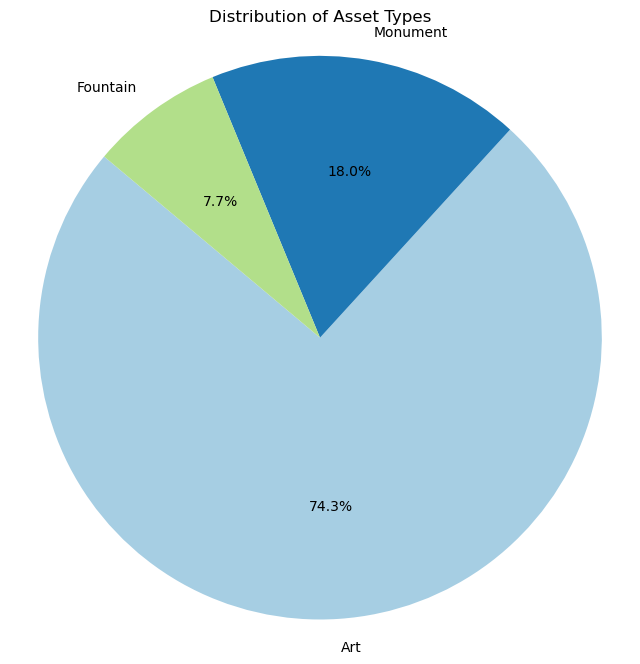

In [71]:
# Count frequency of each Asset Type
asset_counts = places['Asset Type'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(asset_counts, labels=asset_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Asset Types')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

##### Bar Chart: Amount of Artworks Maneged by Different Organizations
<div style="font-family: Aptos; font-size: 16px;"> <br>
The dataset represents the frequency count of artworks by the organisation (denoted by the 'Xorg' column) in the City of Melbourne. The data is visualised through a bar chart, which illustrates the number of artworks associated with each organisation. The bars show the distribution of artworks across various organisations, making it easier to see which organisations have the most public art installations.<br><br>

The x-axis represents the organisations, while the y-axis indicates the number of artworks contributed by each. <br>

Number of Artworks by Organisation (Xorg):<br>

<ul> <li>City of Melbourne: 199 artworks</li>
        <li>VicUrban: 38 artwork</li> 
        <li>Beveridge Williams Surveyors: 15 artwork</li> </ul>
<br>

</div>

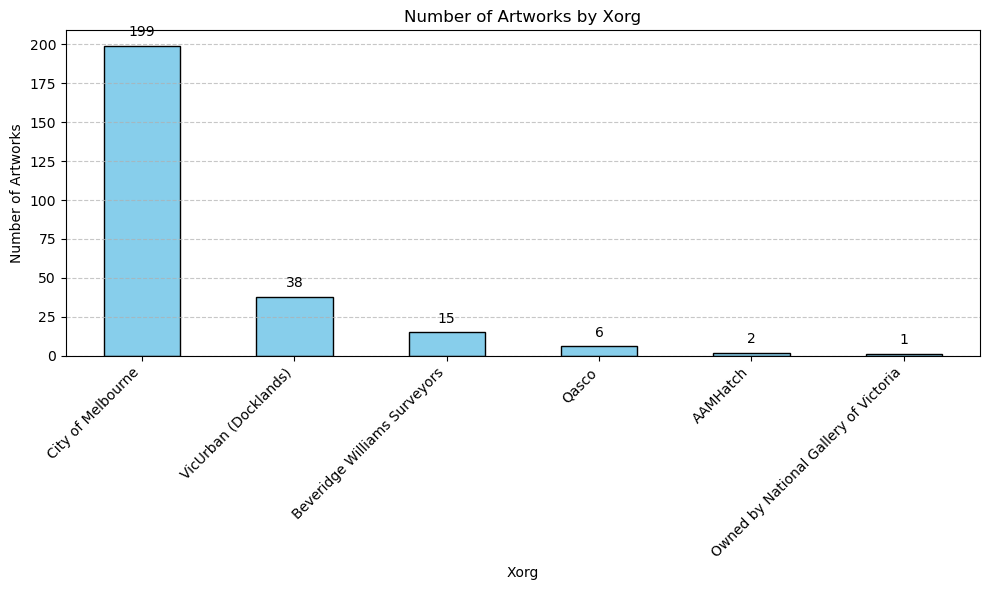

In [74]:

# Count frequency of each Xorg
xorg_counts = places['Xorg'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
ax = xorg_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding text on top of each bar to show the count
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', 
                (i.get_x() + i.get_width() / 2, i.get_height()), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='center', 
                va='bottom', 
                fontsize=10, 
                color='black')

plt.title('Number of Artworks by Xorg')
plt.xlabel('Xorg')
plt.ylabel('Number of Artworks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Word Cloud: Most Common Artists
<div style="font-family: Aptos; font-size: 16px;"> 
This visualisation presents a word cloud representing the artists of various public artworks. The word cloud was generated by combining all the artist names from the dataset, excluding any missing values (NaN). Larger and bolder words indicate artists who appear more frequently in the dataset.<br><br>

</div>

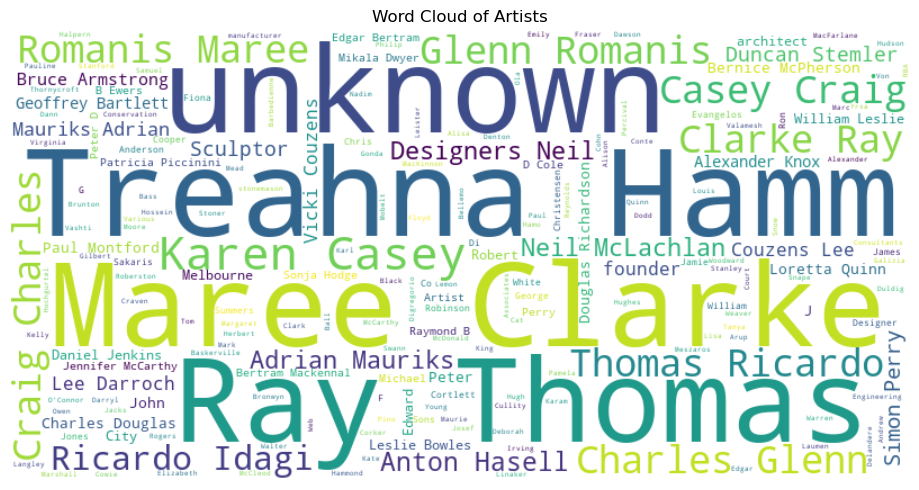

In [77]:

# Drop NaN values from 'Artist' column
artists = places['Artist'].dropna()

# Combine all artist names into a single string
artist_text = " ".join(artists)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(artist_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Artists')
plt.tight_layout()
plt.show()

##### Map: Map Visualization of each Artworks, Fountains and Monuments<div style="font-family: Aptos; font-size: 16px;"> 

This interactive map displays the locations of various public artworks, monuments, sculptures, and panels throughout Melbourne. Each marker on the map represents an asset and is colour-coded based on its type:

- **Blue** markers represent artworks.
- **Green** markers represent monuments.
- **Purple** markers represent sculptures.
- **Orange** markers represent panels.

By clicking on a marker, a detailed tooltip appears, providing information about the asset, including its type, name, associated organisation, artist, and the year it was created. This map serves as an informative guide to the diverse range of public art in Melbourne, offering users the opportunity to explore and learn more about these significant cultural la
</div>ndmarks.


In [80]:
# Convert 'Co-ordinates' column to separate latitude and longitude
places[['Latitude', 'Longitude']] = places['Co-ordinates'].str.split(',', expand=True)
places['Latitude'] = places['Latitude'].astype(float)
places['Longitude'] = places['Longitude'].astype(float)

# Define color mapping for different Asset Types
asset_colors = {
    "Art": "blue",
    "Monument": "green",
    "Sculpture": "purple",
    "Panel": "orange"
}

# Create a base map centered on Melbourne
m = folium.Map(location=[-37.81, 144.96], zoom_start=13)

# Add markers with detailed tooltip
for _, row in places.iterrows():
    asset_type = row['Asset Type']
    color = asset_colors.get(asset_type, "gray")  # Default color if type is missing

    # Construct the tooltip with bold labels
    tooltip = f"""
    <b>Asset Type:</b> {row['Asset Type']}<br>
    <b>Name:</b> {row['Name']}<br>
    <b>Organization:</b> {row['Xorg']}<br>
    <b>Artist:</b> {row['Artist']}<br>
    <b>Year:</b> {row['Art Date']}
    """

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Name'],
        tooltip=tooltip,
        icon=folium.Icon(color=color)
    ).add_to(m)

# Display the map
m
